# GBA 6070 - Programming Foundation for Business Analytics
# Dr. Mohammad Salehan
# Module 7 - Classes and Objects II
In this notebook we discuss inheritance. Inheritance is the ability to define a new class that is a modified version of an existing class. 

## The Rectangle class
You already worked on the Rectangle class in your assignment. A Rectangle is characterized by its length and width. Width and length can be used to calculate the area and permieter of a rectangle. We added these 2 as class methods.

In [2]:
class Rectangle:
    width = 0
    length = 0
    
    def __init__(self, w, l):
        self.width = w
        self.length = l
    
    def area(self):
        return self.width * self.length
    
    def perimeter(self):
        return 2 *(self.width + self.length)

Below we create an instance of circle and call its area and perimeter methods.

In [3]:
r = Rectangle(3,4)
print(r.area())
print(r.perimeter())

12
14


# The Square class
You previously developed a square class too. A square is a special form of Rectangle where width=length. Hence, it can be seen as an extension of Rectangle. In Object-Oriented Programming, the inheritance feature can be use to develop a modified version of an existing class. Below, we define Square to inherit from Rectangle. The constructor of Square accepts one parameter which represents the length of each side. It passes side length as both width and length to the constructor of parent class.

In [4]:
class Square(Rectangle):
    
    def __init__(self, side):
        Rectangle.__init__(self, side, side)

Below we create an instance of Square.

In [5]:
s = Square(5)

Square inherits from Rectangle which means that it inherits all attributes and methods of Rectangle.

In [6]:
print(s.area())
print(s.perimeter())

25
20


Using built-in isinstance function, we can check if an object is an instance of a class. Below we check if s is an instance of Square class.

In [7]:
isinstance(s, Square)

True

Since Square inherits from Rectangle, s is also an instance of Rectangle:

In [8]:
isinstance(s, Rectangle)

True

## Cuboid class
A Cuboid is a 3D rectangle. In addition to width and length, it has a third attribute named height. It can be created by extending Rectangle class.

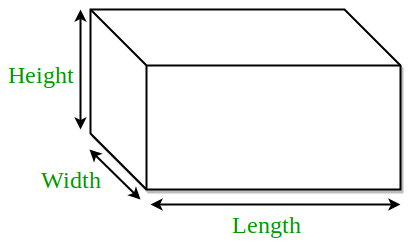

Since Cuboid is 3D, it should have an additional method named volume.

In [9]:
class Cuboid(Rectangle):
    
    height = 0
    
    def __init__(self, w, l, h):
        self.height = h
        Rectangle.__init__(self, w, l)
        
    def volume(self):
        return self.height * self.width * self.length

Below we test the Cuboid class by creating an instance of it and then calculating its volume.

In [10]:
c = Cuboid(5,4,3)
c.volume()

60

## Class exercise
Extend Cubiod class to create a Cube class. A cube is a special type of Cubiod where width, length, and height are equal.
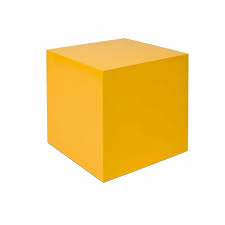

In [23]:
class Cube(Cuboid):
    def __init__(self,side):
        Cuboid.__init__(self,side,side,side)

                                        
cube=Cube(3)
cube.volume()


27

## Method overriding
Let's examine the surface area of Cuboid.

In [24]:
c.area()

94

The answer is incorrect since the formula for area of Cuboid is differnet than that of Rectangle. Thus, we have to override the area method we inherited from Rectangle. This is called method overriding.

In [25]:
class Cuboid(Rectangle):
    
    height = 0
    
    def __init__(self, w, l, h):
        self.height = h
        Rectangle.__init__(self, w, l)
        
    def volume(self):
        return self.height * self.width * self.length
    
    def area(self):
        return 2 * (self.width * self.length + 
                    self.height * self.width + 
                    self.height * self.length)

Let's try again.

In [26]:
c = Cuboid(5,4,3)
c.area()

94

Part of the surface area calculation (self.height * self.width) is the same as the one in the parent class. It is always great to be able to reuse code instead of rewriting everything. Below, we use the area method from the parent class to calculate that portion.

In [27]:
class Cuboid(Rectangle):
    
    height = 0
    
    def __init__(self, w, l, h):
        self.height = h
        Rectangle.__init__(self, w, l)
        
    def volume(self):
        return self.height * self.width * self.length
    
    def area(self):
        return 2 * (super().area() + 
                    self.height * self.width + 
                    self.height * self.length)

In [28]:
c = Cuboid(5,4,3)
c.area()

94

### Printing objects
Let's print the Cuboid object and see what happens.

In [29]:
print(c)

As you see, we get a combination of package_name.class_name at memory_address which is not very useful. by overriding the __str__ method, you can control what is printed when the object is passed to print() function.

In [30]:
class Cuboid(Rectangle):
    
    height = 0
    
    def __init__(self, w, l, h):
        self.height = h
        Rectangle.__init__(self, w, l)
        
    def volume(self):
        return self.height * self.width * self.length
    
    def area(self):
        return 2 * (super().area() + 
                    self.height * self.width + 
                    self.height * self.length)
    
    def __str__(self):
        return 'Cuboid with width={}, length={}, and height={}'.format(self.height, self.width, self.length)

Let's try again.

In [31]:
c = Cuboid(5,4,3)
print(c)

Cuboid with width=3, length=5, and height=4


## Class exercise
In Cube class, override \_\_str\_\_ method to show correct representation of the cube.

In [33]:
class Cube(Cuboid):
    def __init__(self,side):
        Cuboid.__init__(self,side,side,side)
        
    def __str__(self):
        return 'Cube with side={}'.format(self.width)
                                        
cube=Cube(3)
print(cube)

Cube with side=3


## Operator overloading
Python allows you to specify the behavior of operators on programmer-defined types. For example, here we overload the < operator to compare volume of Cuboids.

In [34]:
class Cuboid(Rectangle):
    
    height = 0
    
    def __init__(self, w, l, h):
        self.height = h
        Rectangle.__init__(self, w, l)
        
    def volume(self):
        return self.height * self.width * self.length
    
    def area(self):
        return 2 * (super().area() + 
                    self.height * self.width + 
                    self.height * self.length)
    
    def __str__(self):
        return 'Cuboid with width={}, length={}, and height={}'.format(self.height, self.width, self.length)
    
    def __lt__(self, c2):
        return self.volume() < c2.volume()

Let's test it using 2 objects:

In [35]:
c1 = Cuboid(5,4,3)
c2 = Cuboid(1,2,3)
c1 < c2

False

And test the reverse:

In [36]:
c2 < c1

True

### Class exercise
Overload >= operator using \_\_ge\_\_ method.

In [37]:
class Cuboid(Rectangle):
    
    height = 0
    
    def __init__(self, w, l, h):
        self.height = h
        Rectangle.__init__(self, w, l)
        
    def volume(self):
        return self.height * self.width * self.length
    
    def area(self):
        return 2 * (super().area() + 
                    self.height * self.width + 
                    self.height * self.length)
    
    def __str__(self):
        return 'Cuboid with width={}, length={}, and height={}'.format(self.height, self.width, self.length)
    
    def __lt__(self, c2):
        return self.volume() < c2.volume()
    
    def __ge__(self,c2):
        return self.volume() >= c2.volume()

Then test it using the following code:

In [38]:
c1 = Cuboid(5,4,3)
c2 = Cuboid(1,2,3)
print(c1 >= c2)
print(c2 >= c1)

True
False


In <a href='https://www.programiz.com/python-programming/operator-overloading' target="_blank">this page</a> you can find the complete list of all operators that can be overloaded.

# The goodies

## Conditional expressions
Conditional statements are often used to choose one of two values; for example:

In [39]:
x=-1
if x > 0:
    y = 1
else:
    y = -1
print(y)

-1


We can write this statement more concisely using a conditional expression:

In [40]:
y = 1 if x > 0 else -1
print(y)

-1


## List comprehensions
This function takes a list
of strings, maps the string method capitalize to the elements, and returns a new list of
strings:

In [41]:
def capitalize_all(t):
    res = []
    for s in t:
        res.append(s.capitalize())
    return res

a = ['hi', 'hello', 'apple']
capitalize_all(a)

['Hi', 'Hello', 'Apple']

We can write this more concisely using a list comprehension:

In [42]:
def capitalize_all(t):
    return [s.capitalize() for s in t]

a = ['hi', 'hello', 'apple']
capitalize_all(a)

['Hi', 'Hello', 'Apple']

List comprehensions can also be used for filtering. For example, this function selects only
the elements of t that are upper case, and returns a new list:

In [43]:
def only_upper(t):
    res = []
    for s in t:
        if s.isupper():
            res.append(s)
    return res

b = ['A', 'b', 'C', 'd']
only_upper(b)

['A', 'C']

We can rewrite it using a list comprehension

In [44]:
def only_upper(t):
    return [s for s in t if s.isupper()]

b = ['A', 'b', 'C', 'd']
only_upper(b)

['A', 'C']

## Sets
A set is a group of values that ensures there are no duplicates.

In [45]:
c = ['a', 'b', 'c', 'a', 'b']
d = set(c)
d

{'a', 'b', 'c'}

You can use in keyword to check if a value is in a set.

In [46]:
'a' in d

True

The <= operator checks whether one set is a subset of another, including the possibility that
they are equal, which is true if all the letters in word appear in available.

In [47]:
a = {'a', 'b', 'c', 'd'}
b = {'a', 'b', 'c'}

print(a <= b)
print(b <= a)

False
True
